### Download speeches for a sample senator

In [1]:
import csv
import re
import sys
import matplotlib.pyplot as plt

TAG_RE = re.compile(r'<[^>]+>')
SPACE_RE = re.compile('&nbsp;')

def attr(valueDict, attrPath, defaultValue=''):
    if type(valueDict) != dict:
        raise 'valueDict must be dict type'
    parts = attrPath.split('.')
    cv = valueDict
    for p in parts:
        cv = cv.get(p)
        if cv == None:
            return defaultValue
    return cv

In [50]:
import requests

MAX = 200

headers = {'Accept': 'application/json'}
res = requests.get('http://legis.senado.leg.br/dadosabertos/plenario/lista/votacao/20180101/20180830', headers=headers)
contents = res.json()

votacao = contents['ListaVotacoes']['Votacoes']['Votacao']

print("Downloading materias")
i = 0
alltextsSim = ''
alltextsNao = ''
alltextsSecret = ''
with open("output/votes.csv", "w", encoding='utf-8') as ofile:
    writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    print('Found ' + str(len(votacao)) + ' votes')
    for vot in votacao:
#         print('>>>>'+str(vot.get('CodigoMateria')))
        i = i + 1
#         try:
        if vot.get('CodigoMateria') == None:
            print('materia not found')
            continue
            
        codigoMateria = vot['CodigoMateria']
#         print("Getting materia " + str(codigoMateria))
        res = requests.get('http://legis.senado.leg.br/dadosabertos/materia/' + str(codigoMateria), headers=headers)
        contents = res.json()
        mat = contents['DetalheMateria']['Materia']

        votos = vot['Votos']['VotoParlamentar']
        
        for vp in votos:
            
            #fields descricaoVotacao, data, codigoMateria, ementa, explicacaoEmenta, indexacaoMateria, natureza, tipo,
            #codigoParlamentar, nomeParlamentar, partidoParlamentar, sexoParlamentar, ufParlamentar, votoSimNao
            row = [ vot['DescricaoVotacao'],
                    vot['DataSessao'],
                    vot['CodigoMateria'],
                    attr(mat,'DadosBasicosMateria.EmentaMateria'),
                    attr(mat,'DadosBasicosMateria.ExplicacaoEmentaMateria'),
                    attr(mat,'DadosBasicosMateria.IndexacaoMateria'),
                    attr(mat,'DadosBasicosMateria.NaturezaMateria.NomeNatureza'),
                    mat['IdentificacaoMateria']['SiglaSubtipoMateria'],
                    vp['CodigoParlamentar'],
                    vp['NomeParlamentar'],
                    vp['SiglaPartido'],
                    vp['SexoParlamentar'],
                    vp['SiglaUF'],
                    vp['Voto'],
                  ]
            writer.writerow(row)
    #         print(row)
            if vp['Voto'] == 'Sim':
                alltextsSim = alltextsSim + '\n' + attr(mat,'DadosBasicosMateria.EmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.ExplicacaoEmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.IndexacaoMateria') + ' ' + attr(mat,'DadosBasicosMateria.NaturezaMateria.NomeNatureza')
            elif vp['Voto'] == 'Não':
                alltextsNao = alltextsNao + '\n' + attr(mat,'DadosBasicosMateria.EmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.ExplicacaoEmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.IndexacaoMateria') + ' ' + attr(mat,'DadosBasicosMateria.NaturezaMateria.NomeNatureza')
            elif vp['Voto'] == 'Votou':
                alltextsSecret = alltextsSecret + '\n' + attr(mat,'DadosBasicosMateria.EmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.ExplicacaoEmentaMateria') + ' ' + attr(mat,'DadosBasicosMateria.IndexacaoMateria') + ' ' + attr(mat,'DadosBasicosMateria.NaturezaMateria.NomeNatureza')
                
        sys.stdout.write('.')
            
        if i > MAX:
            break
#         except:
#             if i > MAX:
#                 break

print("Done")

Found 8 votes
........Done


### Word cloud

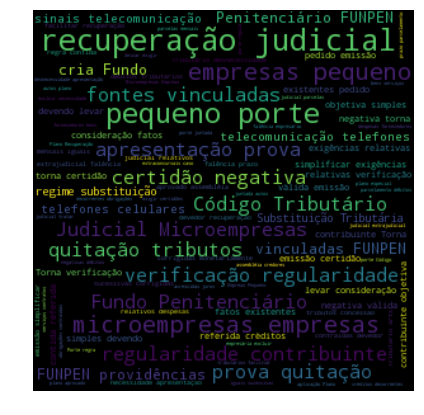

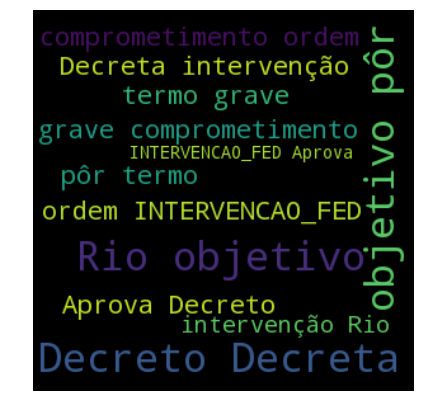

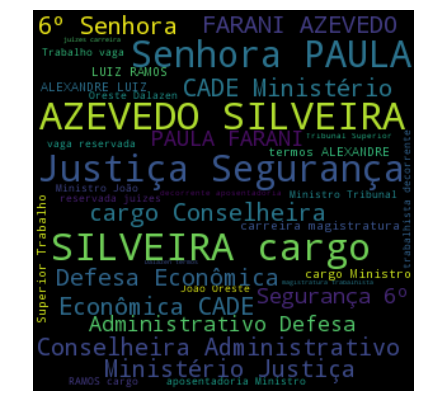

In [51]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8'))
# print(stopwords)

# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=200,
               stopwords=stopwords, max_font_size=100, random_state=42,
               width=300, height=300)

wordcloud = wc.generate(alltextsSim)
plt.figure(figsize=(10,7))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud = wc.generate(alltextsNao)
plt.figure(figsize=(10,7))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud = wc.generate(alltextsSecret)
plt.figure(figsize=(10,7))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()